In [1]:
# !pip install pandas numpy pip install folium networkx matplotlib

In [2]:
import numpy as np
import pandas as pd
import random
from IPython.display import display


#### Load the matrices

In [3]:
battery_expenditure = pd.read_csv('battery_expenditure_matrix.csv')
distance_matrix = pd.read_csv('distance_matrix.csv')
time_matrix = pd.read_csv('time_matrix.csv')

In [4]:
# customer_demands = [[3,4],[5,15],[3,7],[8,7],[6,13]]
# customer_demands = [[3,15],[5,15],[3,15],[8,15],[6,15]]
# customer_demands =[[2,15],[2,15],[3,15],[4,15],[5,15]]
# customer_demands = [[3,4],[4,5],[6,7],[8,9],[10,11]]
customer_demands = [[3,4],[4,5],[5,6],[6,7],[7,8]]


In [5]:
covered_nodes = []

for customer_demand in customer_demands:
    covered_nodes.append(customer_demand[0])
    covered_nodes.append(customer_demand[1])
    sorted(covered_nodes)


#### Generating random combination

In [6]:
num_sequences=20
start_node=0
end_node=16
battery_threshold=10

w1=0.5
w2=0.5

In [7]:
def carCapacityMaintained(route):
    curWt = 0
    for i in range(len(route)):
        wt = route[i][1]
        curWt += wt
        if curWt > 3:
            return False
        if curWt < 0:
            return False
         
    return True


In [8]:
def allCustomersDemand(sequence):
    route=[]
    for node in sequence[1:-1]:
        route.append(node[0])
    return sorted(route) == sorted(covered_nodes)

In [9]:
def sequenceIsValid(route):
    # check for validity if every customer reaches destination
    if not allCustomersDemand(route):
        return False

    # check for validity if car strength not increase 3
    if not carCapacityMaintained(route):
        return False
    
    #check if battery level not decrease less than 0
    for i in range(len(route) - 1):
        node1 = route[i][0]
        node2 = route[i + 1][0]
                
        if node1 == 1 or node1 == 2:
            battery_level=78

            battery_consumption = battery_expenditure.iloc[node1, node2]
            battery_level -= battery_consumption
            if battery_level < battery_threshold:
                return False
    return True

In [10]:
def shuffle_array_except_first_last(arr):
    first_element = arr[0]
    last_element = arr[-1]
    internal_elements = arr[1:-1]
    random.shuffle(internal_elements)
    shuffled_array = [first_element] + internal_elements + [last_element]
    return shuffled_array

In [11]:
def generate_random_sequences(num_sequences,customer_demands=customer_demands):
    sequences = []

    for _ in range(num_sequences):
        while True:
            route = [(0, 0) for _ in range(12)]
            used_positions = set()
            unused_positions = set()
            for i in range(12):
                unused_positions.add(i)
            unused_positions.remove(0)
            unused_positions.remove(11)
            used_positions.add(0)
            used_positions.add(11)

            for demand in customer_demands:
                position1 = random.randint(min(unused_positions),max(unused_positions)-1)
                while position1 in used_positions:
                    position1 = random.randint(min(unused_positions),max(unused_positions)-1)
                unused_positions.remove(position1)
                used_positions.add(position1)

                position2 = random.randint(position1 + 1, max(unused_positions))
                while position2 in used_positions:
                    position2 = random.randint(position1 + 1, max(unused_positions))
                unused_positions.remove(position2)
                used_positions.add(position2)

                route[position1] = (demand[0], +1)  # Insert the start node of the customer demand
                route[position2] = (demand[1], -1)  # Insert the end node of the customer demand

            
            if sequenceIsValid(route):
                sequences.append(route)
                break

    return sequences

In [12]:
random_seq=generate_random_sequences(num_sequences)
random_seq

[[(0, 0),
  (7, 1),
  (3, 1),
  (4, 1),
  (5, -1),
  (4, -1),
  (8, -1),
  (6, 1),
  (5, 1),
  (6, -1),
  (7, -1),
  (0, 0)],
 [(0, 0),
  (3, 1),
  (4, -1),
  (7, 1),
  (6, 1),
  (7, -1),
  (5, 1),
  (4, 1),
  (8, -1),
  (5, -1),
  (6, -1),
  (0, 0)],
 [(0, 0),
  (7, 1),
  (6, 1),
  (4, 1),
  (5, -1),
  (7, -1),
  (3, 1),
  (8, -1),
  (4, -1),
  (5, 1),
  (6, -1),
  (0, 0)],
 [(0, 0),
  (3, 1),
  (7, 1),
  (8, -1),
  (6, 1),
  (4, 1),
  (7, -1),
  (5, -1),
  (5, 1),
  (4, -1),
  (6, -1),
  (0, 0)],
 [(0, 0),
  (5, 1),
  (7, 1),
  (8, -1),
  (6, -1),
  (3, 1),
  (4, -1),
  (6, 1),
  (7, -1),
  (4, 1),
  (5, -1),
  (0, 0)],
 [(0, 0),
  (7, 1),
  (5, 1),
  (3, 1),
  (6, -1),
  (6, 1),
  (7, -1),
  (4, 1),
  (4, -1),
  (8, -1),
  (5, -1),
  (0, 0)],
 [(0, 0),
  (5, 1),
  (7, 1),
  (6, -1),
  (6, 1),
  (7, -1),
  (4, 1),
  (5, -1),
  (8, -1),
  (3, 1),
  (4, -1),
  (0, 0)],
 [(0, 0),
  (4, 1),
  (5, 1),
  (5, -1),
  (7, 1),
  (8, -1),
  (6, 1),
  (6, -1),
  (3, 1),
  (4, -1),
  (7, -1),
  (

In [13]:
def calculate_cost(sequence, time_matrix, distance_matrix, w1, w2):
    cost1 = 0
    cost2 = 0
    cost = 0

    for i in range(len(sequence) - 1):
        node1 = sequence[i][0]
        node2 = sequence[i + 1][0]

        cost1 += time_matrix.iloc[node1, node2]
        cost2 += distance_matrix.iloc[node1, node2]

        cost += (w1 * time_matrix.iloc[node1, node2]) + (w2 * distance_matrix.iloc[node1, node2])

    return pd.DataFrame({'Σt': [cost1], 'Σd': [cost2], 'w1*Σt+w2*Σd': [cost]})

In [14]:
cost_for_each_sequence = [calculate_cost(sequence, time_matrix, distance_matrix, w1, w2) for sequence in random_seq]
result_df = pd.concat(cost_for_each_sequence, ignore_index=True)

In [15]:
result_df

,Σt,Σd,w1*Σt+w2*Σd
0,3.525333,167.9483,85.736817
1,3.621056,170.5643,87.092678
2,3.542917,162.4719,83.007408
3,3.241806,149.9334,76.587603
4,3.475306,161.5902,82.532753
5,2.959667,140.3581,71.658883
6,3.493444,166.1542,84.823822
7,2.699306,126.9189,64.809103
8,3.035583,139.3488,71.192192
9,3.699222,172.0810,87.890111


## Genetic Algorithm implementation

In [16]:
def initialize_population(population_size):
    population = generate_random_sequences(population_size)
    return population


In [17]:
def tournament_selection(population, fitness_values, tournament_size):
    selected_parents = []
    for _ in range(len(population)):
        tournament_indices = np.random.choice(len(population), tournament_size, replace=False)
        tournament_fitness = [fitness_values[i] for i in tournament_indices]
        winner_index = tournament_indices[np.argmin(tournament_fitness)]
        selected_parents.append(population[winner_index])
    return selected_parents

In [18]:
def cyclic_shift(lst, positions):
    length = len(lst)
    positions = positions % length  # Ensure positions is within the range of list length
    return lst[-positions:] + lst[:-positions]

In [19]:
import random
#Redo
def ordered_crossover(parent1, parent2):
    parent1= parent1[1:-1]
    parent2= parent2[1:-1]

    crossover_points = sorted(random.sample(range(1, len(parent1)), 2))
    while True:
        offspring = parent2[crossover_points[0]:crossover_points[1]]
        remaining =[]
        for i in parent1[crossover_points[1]:]:
            if offspring.count(i) + remaining.count(i) < parent1.count(i):
                remaining.append(i)
        
        
        for i in parent1[0:crossover_points[1]]:
            if offspring.count(i) + remaining.count(i) < parent1.count(i):
                remaining.append(i)
        
        offspring = offspring + remaining
        offspring = cyclic_shift(offspring,crossover_points[0])

        offspring= [(0,0)] + offspring + [(0,0)]
        if sequenceIsValid(offspring):
            break
        
        crossover_points = sorted(random.sample(range(1, len(parent1)), 2))

    parent1= [(0,0)] + parent1 + [(0,0)]
    parent2= [(0,0)] + parent2 + [(0,0)]
    return offspring


In [20]:
def inversion_mutation(sequence):
    randPnts = sorted(random.sample(range(1, len(sequence)-2), 2))
    # print("Org: ",sequence)
    while True:
        start = randPnts[0]
        end = randPnts[1]
        
        mutated_sequence = sequence[:start] + list(reversed(sequence[start:end+1])) + sequence[end+1:]
        if sequenceIsValid(mutated_sequence):
            break
        randPnts = sorted(random.sample(range(1, len(sequence)-2), 2))
    # print("Mut: ",mutated_sequence)
    return mutated_sequence

In [21]:
import random
fitness_values_y_coordinates = []

def genetic_algorithm(num_generations, population_size, tournament_size,crossover_probability ,mutation_probability):
    population = initialize_population(population_size)
    # display(pd.DataFrame(population))
    for generation in range(num_generations):
        fitness_values = [calculate_cost(sequence, time_matrix, distance_matrix, w1, w2)['w1*Σt+w2*Σd'].values[0] for sequence in population]
        
        parents = tournament_selection(population, fitness_values, tournament_size)
        print(len(parents), population_size)
        random.shuffle(parents)
        offspring = []

        for i in range(0, len(parents), 2):
            if i + 1 < len(parents):
                if random.uniform(0, 1) < crossover_probability:
                    child1 = ordered_crossover(parents[i], parents[i + 1])
                    child2 = ordered_crossover(parents[i + 1], parents[i])
                else:
                    child1 = parents[i]
                    child2 = parents[i + 1]
                    # print(child1)
                    # offspring.extend([child1, child2])
                offspring.append(child1)
                offspring.append(child2)


        mutated_offspring = []
        for child in offspring:
            if random.uniform(0, 1) < mutation_probability:
                mutated_child = inversion_mutation(child)
                mutated_offspring.append(mutated_child)
            else:
                mutated_offspring.append(child)

        population = mutated_offspring
        current_best_sequence = min(population, key=lambda x: calculate_cost(x, time_matrix, distance_matrix, w1, w2)['w1*Σt+w2*Σd'].values[0])
        current_min_fitness = calculate_cost(current_best_sequence, time_matrix, distance_matrix, w1, w2).iloc[-1,-1]
        fitness_values_y_coordinates.append(current_min_fitness)

    best_sequence = min(population, key=lambda x: calculate_cost(x, time_matrix, distance_matrix, w1, w2)['w1*Σt+w2*Σd'].values[0])
    
    return best_sequence,population


In [22]:

best_sequence,final_population = genetic_algorithm(num_generations=100, population_size=50, tournament_size=5, crossover_probability=0.95,mutation_probability=0.03)
print("Best Sequence:", best_sequence)
costdf = calculate_cost(best_sequence, time_matrix, distance_matrix, w1, w2)
display(costdf)
print("Best Cost:",costdf.iloc[-1,-1])


50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
50 50
Best Sequence: [(0, 0), (6, 1), (5, -1), (5, 1), (7, -1), (7, 1), (8, -1), (4, 1), (4, -1), (3, 1), (6, -1), (0, 0)]


,Σt,Σd,w1*Σt+w2*Σd
0,2.151028,95.2446,48.697814


Best Cost: 48.69781388888889


In [23]:
cost_for_each_sequence = [calculate_cost(sequence, time_matrix, distance_matrix, w1, w2) for sequence in final_population]
result_df = pd.concat(cost_for_each_sequence, ignore_index=True)
result_df = result_df.drop_duplicates()
print(result_df.shape[0])

3


### Convergence curve

In [24]:
import matplotlib.pyplot as plt

def plot_GA_Convergence_curve(x_values, y_values, xlabel="Generation", ylabel="Fitness Value", title="GA convergence curve"):
    plt.plot(x_values, y_values)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

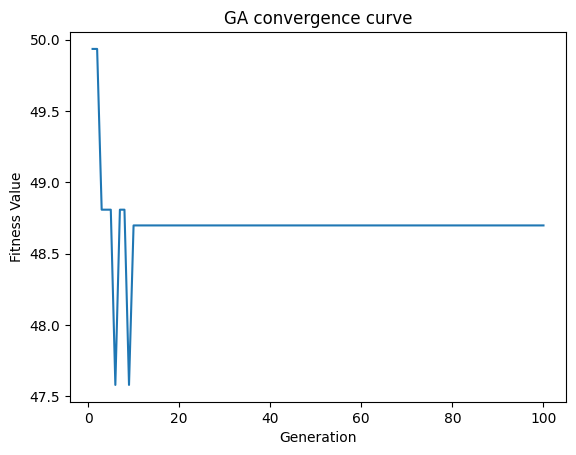

In [25]:
x_values = []
for i in range (1,101):
    x_values.append(i)
plot_GA_Convergence_curve(x_values,fitness_values_y_coordinates)

In [26]:
result_df

,Σt,Σd,w1*Σt+w2*Σd
0,2.151028,95.2446,48.697814
40,2.768056,126.2364,64.502228
47,2.638444,118.2957,60.467072


In [27]:
final_population_list=final_population
final_population=pd.DataFrame(final_population).drop_duplicates()
display(final_population)


,0,1,2,3,4,5,6,7,8,9,10,11
0,"(0, 0)","(6, 1)","(5, -1)","(5, 1)","(7, -1)","(7, 1)","(8, -1)","(4, 1)","(4, -1)","(3, 1)","(6, -1)","(0, 0)"
10,"(0, 0)","(6, 1)","(5, -1)","(5, 1)","(7, 1)","(7, -1)","(8, -1)","(4, 1)","(4, -1)","(3, 1)","(6, -1)","(0, 0)"
40,"(0, 0)","(6, 1)","(7, -1)","(5, 1)","(5, -1)","(7, 1)","(8, -1)","(4, 1)","(4, -1)","(3, 1)","(6, -1)","(0, 0)"
47,"(0, 0)","(6, 1)","(5, -1)","(7, 1)","(7, -1)","(5, 1)","(8, -1)","(4, 1)","(4, -1)","(3, 1)","(6, -1)","(0, 0)"


In [28]:
coord=[(12.975668, 77.6413089),
       (12.9154635, 77.6158909),
       (12.9443978, 77.6514662),
       (13.1067756, 77.6005477),
        (13.06002, 77.5766226),
        (13.0887623, 77.5823852),
        (13.0985096, 77.6273422),
        (13.0686238, 77.4765245),
        (13.0499117, 77.516421),
        (13.0757683, 77.4726196),
        (13.0764541, 77.4585122),
        (13.0562923, 77.6328481),
        (13.1180494, 77.5777231),
        (12.9774995, 77.5900342),
        (13.1144798, 77.5677789),
        (12.9767773, 77.5732599),
        (12.975668, 77.6413089)]

def plot_data_from_sequence(sequence):
    cities_data=[]
    for sq in sequence:
        node = sq[0]
        cust = sq[1]
        coordinate = coord[node]
        cities_data.append([node,coordinate,cust])
    return cities_data
        

In [29]:
import networkx as nx
import matplotlib.pyplot as plt
def plot_node_sequence(node_sequence):
    G = nx.Graph()

    for i in range(len(node_sequence) - 1):
        node_a, coords_a, action_a = node_sequence[i]
        node_b, coords_b, action_b = node_sequence[i + 1]
        G.add_node(node_a, pos=coords_a, action=action_a)
        G.add_node(node_b, pos=coords_b, action=action_b)
        G.add_edge(node_a, node_b, weight=1) 

    pos = nx.get_node_attributes(G, 'pos')
    node_actions = nx.get_node_attributes(G, 'action')

    # Draw nodes with different colors based on actions
    node_colors = [node_actions[node] for node in G.nodes()]
    nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=700, node_color=node_colors, cmap=plt.cm.RdYlBu, font_color='black', font_size=8, width=2)

    plt.show()

In [30]:
best_sequence_data=plot_data_from_sequence(best_sequence)
best_sequence_data

[[0, (12.975668, 77.6413089), 0],
 [6, (13.0985096, 77.6273422), 1],
 [5, (13.0887623, 77.5823852), -1],
 [5, (13.0887623, 77.5823852), 1],
 [7, (13.0686238, 77.4765245), -1],
 [7, (13.0686238, 77.4765245), 1],
 [8, (13.0499117, 77.516421), -1],
 [4, (13.06002, 77.5766226), 1],
 [4, (13.06002, 77.5766226), -1],
 [3, (13.1067756, 77.6005477), 1],
 [6, (13.0985096, 77.6273422), -1],
 [0, (12.975668, 77.6413089), 0]]

Best Sequence:  [(0, 0), (6, 1), (5, -1), (5, 1), (7, -1), (7, 1), (8, -1), (4, 1), (4, -1), (3, 1), (6, -1), (0, 0)]
Best Cost:  48.69781388888889


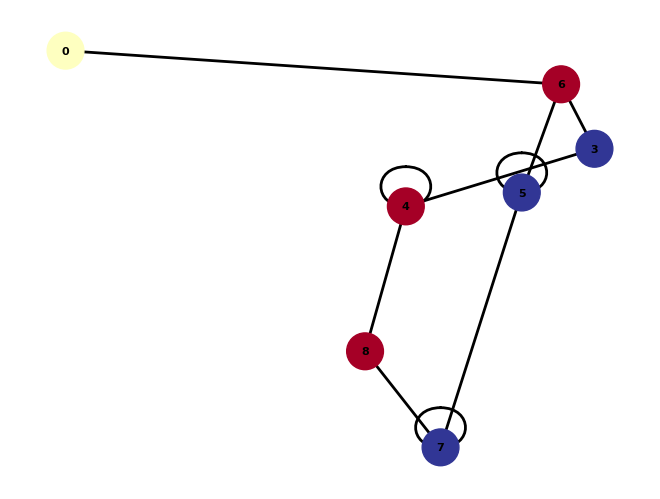

In [31]:
# temp_cost=calculate_cost([(0, 0), (3, 1), (4, -1), (4, 1), (5, -1), (5, 1), (6, -1), (6, 1), (7, -1), (7, 1), (8, -1), (0, 0)],time_matrix,distance_matrix,0.5,0.5)
# print(temp_cost)
print("Best Sequence: ",best_sequence)
print("Best Cost: ",costdf.iloc[-1,-1])
plot_node_sequence(best_sequence_data)

In [32]:
# for seq in final_population_list:
#     print("Sequence: ",seq)
#     plot_node_sequence(plot_data_from_sequence(seq))

# Flower Pollen Algorithm


In [122]:
import random
import numpy as np

def flower_pollination_algorithm(population_size, max_generations, self_pollination_probability, gamma, beta):
    population = generate_random_sequences(population_size)

    for generation in range(max_generations):
        fitness = [fitness_function(sequence) for sequence in population]

        sorted_population = [x for _, x in sorted(zip(fitness, population), key=lambda pair: pair[0])]

        for i in range(population_size):
            if random.random() < self_pollination_probability:
                print('noo')
                # Self-pollination
                new_solution = self_pollination(sorted_population[i], gamma)
                print("Before Self Pollination: ", sorted_population[i])
                print("After Self Pollination: ", new_solution)
            # else:
            #     # Cross-pollination
            #     # Randomly choose a flower to be the pollinator
            #     pollinator_index = random.randint(0, population_size - 1)
            #     new_solution = cross_pollination(sorted_population[i], sorted_population[pollinator_index], beta)
            #     print("Before Cross Pollination: ", sorted_population[i], sorted_population[pollinator_index])
            #     print("After Cross Pollination: ", new_solution)

            # while not sequenceIsValid(new_solution):
                # repaired_sequence = repair_sequence(new_solution, sorted_population[i])
                # new_solution = repaired_sequence

            # If the new solution is valid and better, replace the old solution
            # if fitness_function(new_solution) < fitness_function(population[i]):
            #     population[i] = new_solution

    best_solution = min(population, key=fitness_function)
    return best_solution

def repair_sequence(new_solution, old_solution):
    return new_solution


def self_pollination(xt_i, xt_j, xt_k, k=1e-20):
    # Convert the strings to lists of integers
    xt_i_list = [xt_i[0] for s in xt_i]
    xt_j_list = [xt_j[0] for s in xt_j]
    xt_k_list = [xt_k[0] for s in xt_k]
    
    # Calculate the difference (xt_j - xt_k)
    difference = [str(xj - xk) for xj, xk in zip(xt_j_list, xt_k_list)]

    # Generate a random number from a uniform distribution
    epsilon = np.random.uniform(0, 1)

    # Calculate the product: k * epsilon * (xt_j - xt_k)
    product = [int(k * epsilon * int(diff)) for diff in difference]

    # Add the product to the current solution
    new_solution = [str(xi + p) for xi, p in zip(xt_i_list, product)]

    # Join the list elements to form the new assembly sequence
    new_assembly_sequence = ', '.join(new_solution)

    return new_assembly_sequence

def cross_pollination(g_star, xt_i, gamma=1e-10, step_length=5):
    g_star_list = [s[0] for s in g_star]
    xt_i_list = [s[0] for s in xt_i]
    # Calculate the difference (g* - xt_i)
    difference = [str(g - xi) for g, xi in zip(g_star_list, xt_i_list)]
    # Calculate the product: gamma * step_length * (g* - xt_i)
    product = [int(gamma * step_length * int(diff)) for diff in difference]
    # Add the product to the current solution
    new_solution = [str(xi + p) for xi, p in zip(xt_i_list, product)]
    # Join the list elements to form the new assembly sequence
    new_assembly_sequence = ', '.join(new_solution)
    return new_assembly_sequence

def levy_distribution(dimension):
    beta = 1.5
    # Levy distribution for global pollination
    sigma = (np.math.gamma(1 + beta) * np.sin(np.pi * beta / 2) / (np.math.gamma((1 + beta) / 2) * beta * 2 ** ((beta - 1) / 2))) ** (1 / beta)
    u = np.random.normal(0, sigma, dimension)
    v = np.random.normal(0, 1, dimension)
    step = u / abs(v) ** (1 / beta)
    return step


def fitness_function(sequence):
    return calculate_cost(sequence, time_matrix, distance_matrix, w1, w2).iloc[-1,-1]


In [123]:
print(flower_pollination_algorithm(50,50,0.1,0.1,0.1))

UnboundLocalError: cannot access local variable 'new_solution' where it is not associated with a value